# Aritra Raut

In [97]:
# import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import house_sales_data as hsd
from sklearn.model_selection import  train_test_split

In [98]:
## Sacramento house price data; load
data = hsd.house_sales_data() 
print(data.keys())

## Get the target (i.e., price) and two features
price = data["price"]
beds = data["beds"]
area = data["area"]

dict_keys(['price', 'area', 'beds', 'baths', 'condo', 'location'])


In [99]:
# Implement gradient descent (NOT SGD, just simple GD!)
def gradient_descent1(X, y, max_iteration, learning_rate):
    m, n = X.shape
    theta = np.zeros(n,np.float32)
    costs = np.zeros(max_iteration)
    for j in range(n):
        for k1 in range(max_iteration):
            sum2=0.0
            for i in range(m):
                sum1=0.0
                for k in range(n):
                    sum1=sum1+(X[i,k]*theta[k])  
                temp_sum=(sum1-y[i])
                costs[k1]+=(1/m)*((temp_sum)**2)
                sum2=sum2+(temp_sum*X[i,j])
            theta[j]=theta[j]-(learning_rate*(2/m)*sum2)
    return theta,costs      


In [100]:
# Normalize data 
def normalize_data(X, y, normalize_cols):
    min_X = X[:,normalize_cols].min(axis=0)
    max_X = X[:,normalize_cols].max(axis=0)
    min_y = y.min()
    max_y = y.max()
    X[:,normalize_cols] = (X[:,normalize_cols] - min_X) / (max_X - min_X)
    y[:] = (y - min_y) / (max_y - min_y)
    return X,y,min_X, max_X, min_y, max_y


In [107]:
# Implement an evaluation metric for regression
def evaluation_metric(y,y_hat):
    sum1=sum((y_hat-y)**2)
    return sum1/len(y)

In [102]:
# Prepare data this way
X_train = np.hstack((area[:,np.newaxis], beds[:,np.newaxis], np.ones(area.shape[0])[:,np.newaxis]))
y_train = price
X, y, min_X, max_X, min_y, max_y = normalize_data(X_train, y_train, [True, True, False])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
# call gradient descent and fine-tune your learning rate
iters=1000
learning_rate=.1
theta,err=gradient_descent1(X_train, y_train, iters, learning_rate)
print(theta)

[0.91875994 0.01074149 0.01104406]


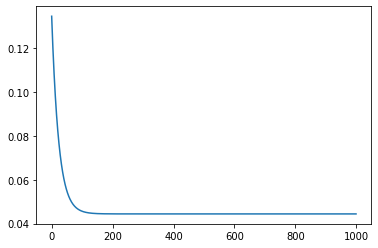

In [104]:
# plot cost vs iterations 
# note gradient descent return costs for all iterations
plt.plot(err)

In [108]:
# print evaluation metric for test set while 
# changing max_iteration from 500 to 2000
# Note the best value of evaluation metric you get

e=[]
for i in range(500,2000,100):
    theta,err=gradient_descent1(X_test, y_test,i, learning_rate)
    y_hat=X_test@theta
    e.append(evaluation_metric(y_test,y_hat))


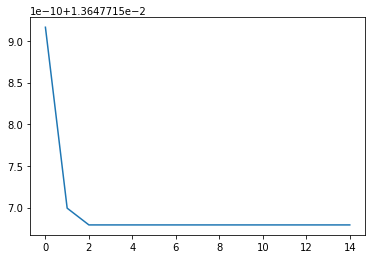

In [109]:
plt.plot(e)

In [111]:
# compare your solution with scikit-learn library
from sklearn.linear_model import LinearRegression

In [112]:
# Create linear regression object
model=LinearRegression()

In [113]:
# Train the model using the training sets
model.fit(X_train,y_train)

LinearRegression()

In [116]:
# Predict on test set and print evaluation metric
# How much does it differ by from
y_pred=model.predict(X_test)
print(evaluation_metric(y_test,y_pred),evaluation_metric(y_test,y_hat))


0.01260250330511888 0.013647715679294584


In [ ]:
evaluat